<a href="https://colab.research.google.com/github/Kartik-Koul/Working-with-Python_Modules/blob/main/Playing_Around_With_Scikit_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-image

In [6]:
from skimage import data

In [3]:
# Exploring some images in the data sub-module

In [4]:
import matplotlib.pyplot as plt

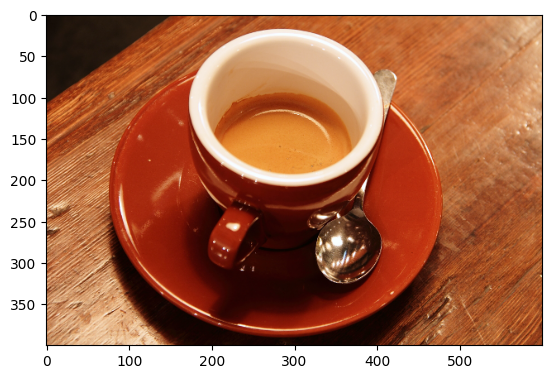

In [28]:
coffee = data.coffee() # A nice cup of coffee
plt.figure()
plt.imshow(coffee)
plt.show()

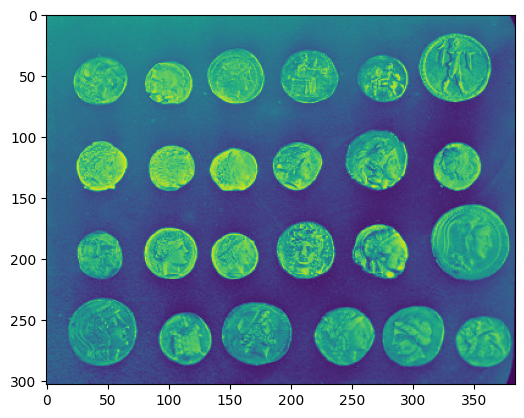

In [13]:
coins = data.coins() # Some ancient coins from Pompeii
plt.figure()
plt.imshow(coins)
plt.show()

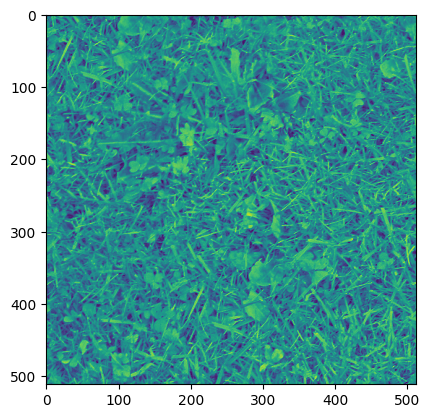

In [14]:
grass = data.grass() # A nice little patch of grass
plt.figure()
plt.imshow(grass)
plt.show()

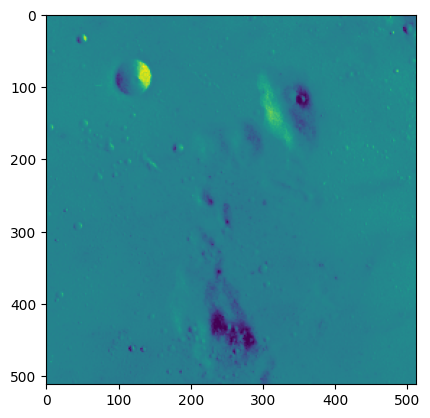

In [15]:
moon = data.moon() # The surface of the moon
plt.figure()
plt.imshow(moon)
plt.show()

In [16]:
# Another sub-module is skimage.filters
# As the name suggest, it allows you to apply a multitude of different filters on your image

In [17]:
# Let us find a threshold value using skimage.filters.threshold_otsu
# Otsu's method is a popular thresholding method that separates a picture into foreground or background based on grayscale pixel intensities.
# It then uses the greyscale histogram of an image to detect an optimal threshold value that separates two regions with the maximum amount of inter_class variance

In [18]:
import skimage.filters as filters

In [19]:
threshold_value = filters.threshold_otsu(coffee)
threshold_value

<ipython-input-19-ca6a9f2dc125>:1: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (400, 600, 3) looks like that of an RGB image.
  threshold_value = filters.threshold_otsu(coffee)


109

In [20]:
# This gives us a warning as it correctly identifies the image as RGB, not Greyscale.
# Let us change that.

In [23]:
import skimage.color as color

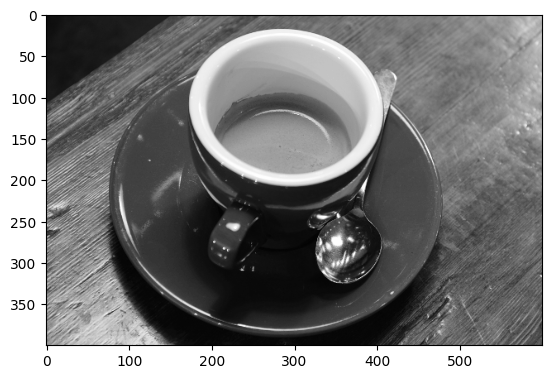

In [45]:
gray_coffee = color.rgb2gray(coffee)
plt.figure()
plt.imshow(gray_coffee, cmap="gray")
plt.show()

In [25]:
threshold_value = filters.threshold_otsu(coffee)
threshold_value

0.392749870557598

In [26]:
# We now get a correct threshold value.
# And it will lie between 0 and 1 because a greyscale image has individual pixel intensities set between the binary range of [0,1]

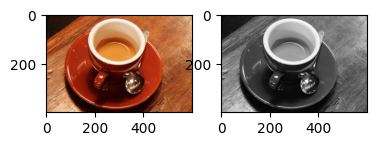

In [43]:
# Observing the difference between two such images.
plt.figure()
plt.subplot(1,3,1)
plt.imshow(coffee)
plt.subplot(1,3,2)
plt.imshow(gray_coffee, cmap="gray")
plt.show()

In [ ]:
# But what if I want to read a file of my own? Well I can do that as well.
# Let me upload a random photo of a cat from google images.

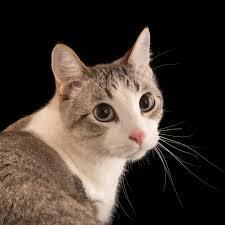

In [40]:
import skimage as ski

In [41]:
filename = "/content/cat.jpeg"
cat = ski.io.imread(filename)

[]

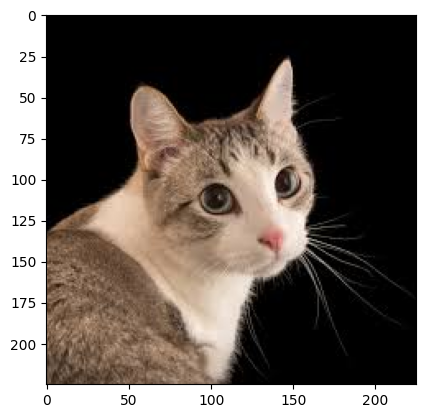

In [42]:
plt.figure()
plt.imshow(cat)
plt.plot()

In [46]:
# To convert an RGB to dimensions more understandable by humans, let us convert them to their HSV form.
# HSV = Hue , Saturation, Value
# You may have heard these terms while fiddling around with the photo editor of your mobile devices

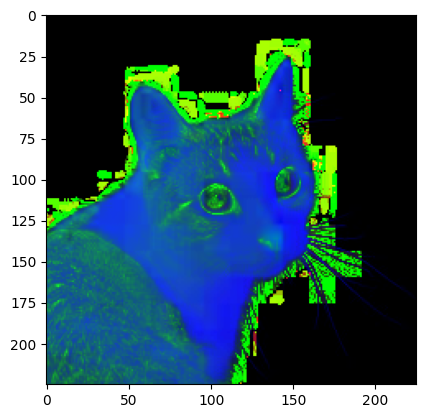

In [47]:
cat_hsv = ski.color.rgb2hsv(cat)
plt.figure()
plt.imshow(cat_hsv)
plt.show()

In [49]:
# Well now the cute cat looks scary. Great!
# Let me include a colorbar for this image as well and display this haunted version of the cat beside its original self.

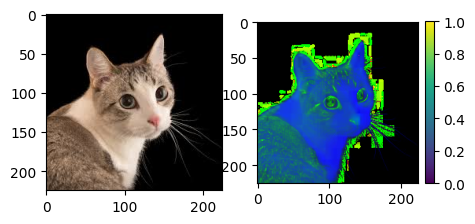

In [56]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(cat)
plt.subplot(1,2,2)
cat_hsv_colorbar = plt.imshow(cat_hsv)
plt.colorbar(cat_hsv_colorbar, fraction = 0.046, pad = 0.04)
plt.show()

In [61]:
# Let's say I now want to perform segmentation with the help of this library.
# Let's see use manual thresholding for the purpose of segmentation here.

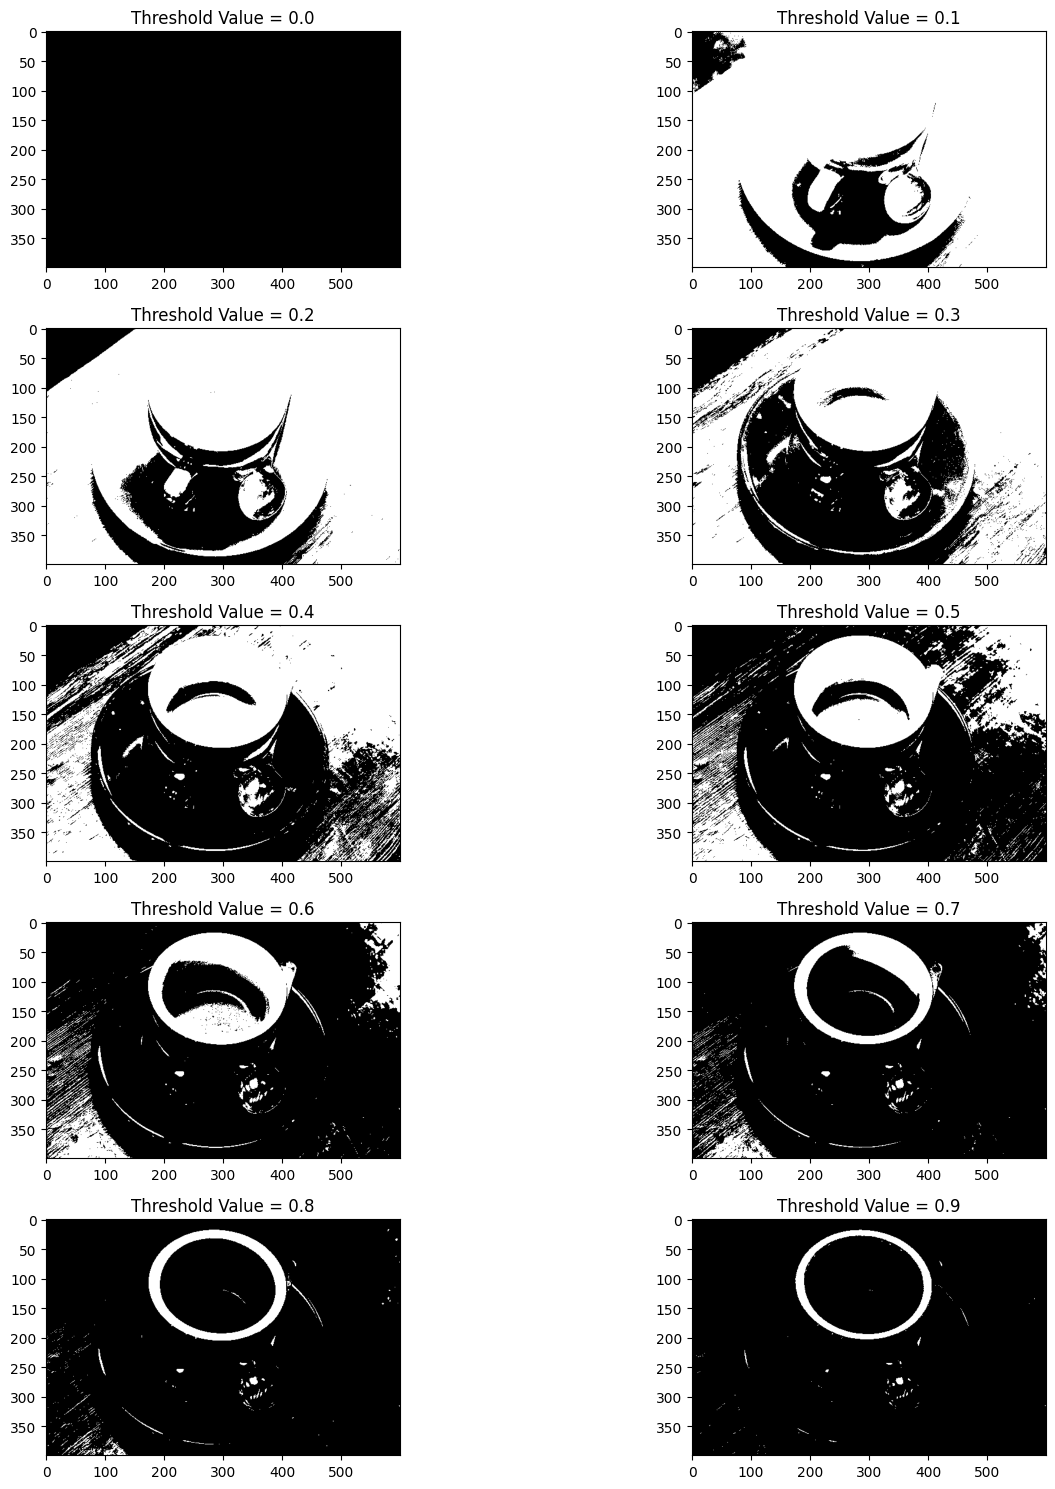

In [60]:
grey_coffee = color.rgb2gray(ski.data.coffee())
plt.figure(figsize=(15,15))

for i in range(10):
  bin_grey_coffee = (grey_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)
  plt.title("Threshold Value = "+str(round(0.1*i,1)))
  plt.imshow(bin_grey_coffee, cmap='gray')

plt.tight_layout()
plt.show()

In [62]:
# Remember skimage.filters.threshold_otsu?
# What if I use that thresholding methodology for segmentation here?

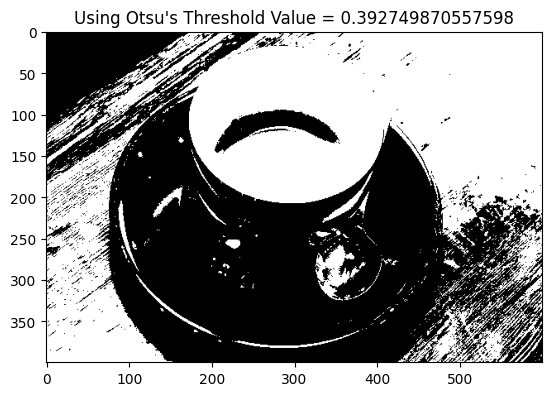

In [63]:
gray_coffee = ski.color.rgb2gray(ski.data.coffee())
thresh_coffee = ski.filters.threshold_otsu(gray_coffee)
binarized_gray_coffee = (gray_coffee > thresh_coffee)*1
plt.figure()
plt.title("Using Otsu's Threshold Value = "+str(thresh_coffee))
plt.imshow(binarized_gray_coffee, cmap='gray')
plt.show()

In [64]:
# I did some looking around, and found 2 more thresholding methods.
# Let us try to use them as well for a similar purpose.
# These 2 methods are Niblack's and Sauvola's methods.

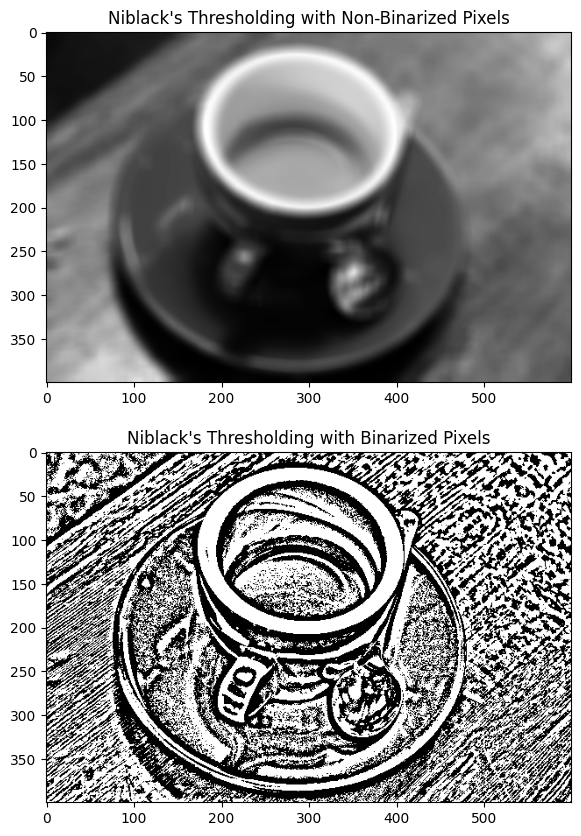

In [73]:
grey_coffee = ski.color.rgb2gray(ski.data.coffee())
thresh_coffee_2 = ski.filters.threshold_niblack(grey_coffee)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(thresh_coffee_2, cmap="gray")
plt.title("Niblack's Thresholding with Non-Binarized Pixels")
plt.subplot(2,1,2)
plt.imshow((grey_coffee > thresh_coffee_2)*1, cmap="gray")
plt.title("Niblack's Thresholding with Binarized Pixels")
plt.show()

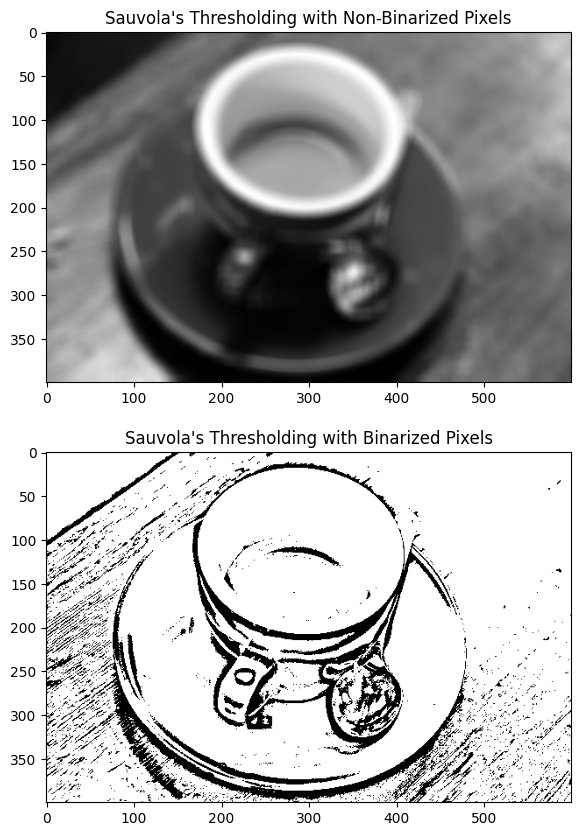

In [74]:
grey_coffee = ski.color.rgb2gray(ski.data.coffee())
thresh_coffee_2 = ski.filters.threshold_sauvola(grey_coffee)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(thresh_coffee_2, cmap="gray")
plt.title("Sauvola's Thresholding with Non-Binarized Pixels")
plt.subplot(2,1,2)
plt.imshow((grey_coffee > thresh_coffee_2)*1, cmap="gray")
plt.title("Sauvola's Thresholding with Binarized Pixels")
plt.show()

In [75]:
# Next, we try the active contour segmentation method.
# This method involves the minimization of an energy functional - consisting of an internal and external component.
# Let's say we want to want focus on a particular object in an image.
# we then define an initial contour around that object. This contour can be either a circle or a manually defined shape.
# The algorithm then works on iteratively evolving and minimizing the energy functional.
# The internal component works on maintaining the shape and continuity of the curve.
# The external components works on attracting the contour towards the object.
# The process continues up till the point of convergence - when the contour stabilizes.

> Total Energy of the active contour, also known as the "snake"
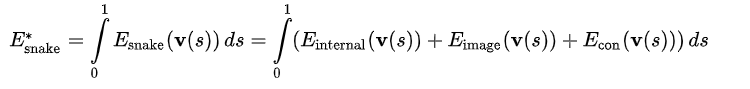

In [76]:
import numpy as np

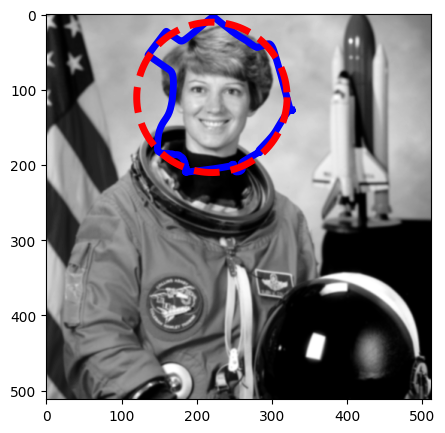

In [86]:
astronaut = ski.data.astronaut() # Using the sample image of Eileen Collins as our input image in this question
gray_astronaut = ski.color.rgb2gray(astronaut)
# In order to de-noise the image, we apply the gaussian filter on the image.
gray_astronaut_denoised = ski.filters.gaussian(gray_astronaut, sigma=1) # Sigma value = Standard Deviation for Gaussian Kernel = 1

# Localising the circle's center at 220, 100 -- basically near the astronaut's face
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500)) # Generating an evenly spaced number array over an interval
x2 = 110 + 100*np.sin(np.linspace(0, 2*np.pi, 500))

#Generating the cirle
snake = np.array([x1,x2]).T

astronaut_snake = ski.segmentation.active_contour(gray_astronaut_denoised, snake)

fig = plt.figure(figsize=(5, 5))

plt.imshow(gray_astronaut_denoised, cmap="gray")

plt.plot(astronaut_snake[:, 0],
        astronaut_snake[:, 1],
        '-b', lw=5)

# Plotting the circle around face
plt.plot(snake[:, 0], snake[:, 1], '--r', lw=5)

In [90]:
# Performing the operation once again with the coffee image

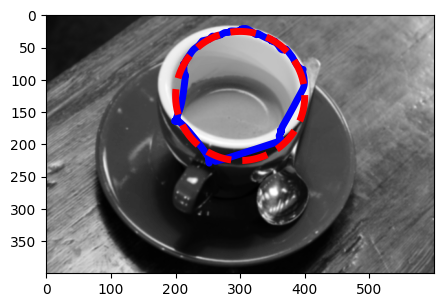

In [89]:
coffee = ski.data.coffee()
gray_coffee = ski.color.rgb2gray(coffee)

gray_coffee_denoised = ski.filters.gaussian(gray_coffee, sigma=1)
X = 300 + 100*np.cos(np.linspace(0,2*np.pi,1000))
Y = 125 + 100*np.sin(np.linspace(0,2*np.pi,1000))

coffee_snake = ski.segmentation.active_contour(gray_coffee_denoised, np.array([X,Y]).T)

plt.figure(figsize=(5,5))
plt.imshow(gray_coffee_denoised, cmap="gray")
plt.plot(coffee_snake[:,0],coffee_snake[:,1],'-b',lw=5)
plt.plot(X,Y,'--r',lw=5)